Feedback dari anda diperlukan! bantu kami dalam [meningkatkan modul ini](https://forms.gle/pWJd6y4hY4KWMcno6).

# Memodelkan Populasi

Permasalahan ini muncul ketika ahli-ahli biologi pada akhir abad 18 membuat model populasi untuk memahami dinamika pertumbuhan dan penurunan populasi organisme. Thomas Malthus adalah orang pertama yang menyadari populasi tumbuh secara geometrik ketika membayangkan nasib umat manusia. Namun model ini belum sempurna, *milestone*-nya adalah model populasi logistik yang dikembangkan oleh Pierre François Verhulst (1838).

Selanjutnya model populasi menjadi ketertarikan ahli biologi abad 20 karena pertumbuhan populasi manusia yang *ngga sustainance* di beberapa negara(?) Eropa.

The Lotka–Volterra predator–prey model was initially proposed by Alfred J. Lotka in the theory of autocatalytic chemical reactions in 1910.[4][5] This was effectively the logistic equation,[6] originally derived by Pierre François Verhulst.[7] In 1920 Lotka extended the model, via Andrey Kolmogorov, to "organic systems" using a plant species and a herbivorous animal species as an example[8] and in 1925 he utilised the equations to analyse predator–prey interactions in his book on biomathematics.[9] The same set of equations was published in 1926 by Vito Volterra, a mathematician and physicist, who had become interested in mathematical biology.[5][10][11] Volterra's enquiry was inspired through his interactions with the marine biologist Umberto D'Ancona, who was courting his daughter at the time and later was to become his son-in-law. D'Ancona studied the fish catches in the Adriatic Sea and had noticed that the percentage of predatory fish caught had increased during the years of World War I (1914–18). This puzzled him, as the fishing effort had been very much reduced during the war years. Volterra developed his model independently from Lotka and used it to explain d'Ancona's observation.[12]

The model was later extended to include density-dependent prey growth and a functional response of the form developed by C. S. Holling; a model that has become known as the Rosenzweig–McArthur model.[13] Both the Lotka–Volterra and Rosenzweig–MacArthur models have been used to explain the dynamics of natural populations of predators and prey, such as the lynx and snowshoe hare data of the Hudson's Bay Company[14] and the moose and wolf populations in Isle Royale National Park.[15]

In the late 1980s, an alternative to the Lotka–Volterra predator–prey model (and its common-prey-dependent generalizations) emerged, the ratio dependent or Arditi–Ginzburg model.[16] The validity of prey- or ratio-dependent models has been much debated.[17]

The Lotka–Volterra equations have a long history of use in economic theory; their initial application is commonly credited to Richard Goodwin in 1965[18] or 1967.[19][20] 

Model ini selanjutnya dikembangkan lebih lanjut oleh Patrick Leslie (1939) yang menggunakan matriks untuk memodelkan banyak populasi per kelompok umur; dan oleh Robert MacArthur - E. O. Wilson yang memodelkan imigrasi dan kepunahan.

## Model Malthus
[Model populasi Malthus](https://en.wikipedia.org/wiki/Malthusian_growth_model) adalah model paling sederhana untuk menirukan perkembangan populasi manusia. Dalam modelnya, laju populasi manusia akan **tumbuh sebanding** dengan banyak populasinya. Secara matematis, jika kita nyatakan waktu  dengan $t$ dan $P(t)$ menyatakan populasi manusia saat $t$, hubungan ini dapat ditulis sebagai

$$\frac{\Delta P}{\Delta t} \propto P$$

atau, dengan menyatakan rasio pertumbuhan populasi sebagai $r$, persamaan ini dapat diubah ke persamaan diferensial

$$\frac{dP}{dt} = rP$$

Lewat metode separasi variabel, persamaan ini memiliki solusi **persamaan analitik**

$$P_t = P_0\,e^{rt}$$

dengan $P_0$ adalah besar populasi awal. Persamaan analitik menawarkan solusi pasti suatu permasalahan (dalam hal ini, populasi saat $t$), namun mencari solusi analitik suatu belum tentu mudah. Dalam keadaan ini, kita beralih ke **persamaan beda hingga** dengan memperhatikan bahwa banyak populasi saat $t$ akan sama dengan banyak populasi saat $t-\Delta t$, ditambah dengan banyaknya pertumbuhan populasi tersebut selama $\Delta t$. Atau secara matematis:

$$P_t = P_{t-\Delta t} + P_{t-\Delta t}\Delta t
\\ = P_{t-\Delta t}\,(1 + \Delta t)
$$

Selanjutnya, mari kita modelkan permasalahan ini:
{problemo}

langkah pertama adalah dengan inisialisasi variabel

In [1]:
LamaSimulasi = 3;    # dalam tahun
PopulasiAwal = 1000;
RasioTumbuh  = 0.01;

dt    = 1/(LamaSimulasi*365); # dt = setiap hari
waktu = 1:LamaSimulasi/dt;    # banyak simulasi

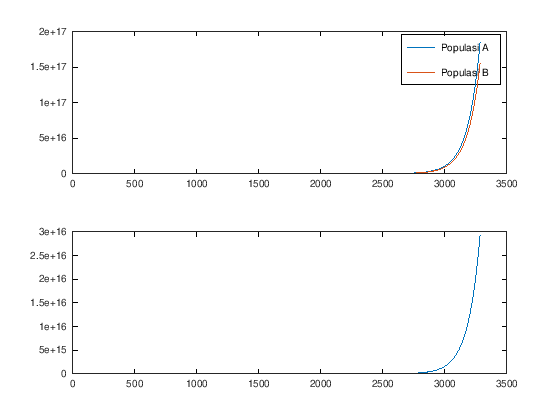

In [2]:
# Banyak populasi secara analitik, beda hingga, dan selisih kedua perhitungan
PopulasiA    = [PopulasiAwal];
PopulasiB    = [PopulasiAwal];
SelisihAB    = [0];

# menghitung besar populasi baru setiap waktunya
for t = waktu(2:end)
    PopulasiA(t) = PopulasiAwal * exp(RasioTumbuh*t);
    PopulasiB(t) = PopulasiB(t-1) * (1 + RasioTumbuh);
    SelisihAB(t) = PopulasiA(t) - PopulasiB(t);
end

#plotting
subplot(2,1,1)
plot(PopulasiA, '-', PopulasiB, '-')
legend('Populasi A', 'Populasi B')

subplot(2,1,2)
plot(SelisihAB)

{komen hasil}

## Model Logistik

Model Malthus tidak mempertimbangkan kapasitas lingkungan, seperti luas daerah dan makanan yang tersedia. Hal ini dapat diperbaiki dengan mempertimbangkan anggota populasi yang meninggal. Anggap banyaknya populasi yang meninggal sebagai $D$, dan kapasitas lingkungan sebagai $M$. Dengan asumsi banyak kematian populasi sebanding dengan pertumbuhan populasi, maka dapat ditulis

$$\frac{dD}{dt} = \Big(r\frac{P}{M}\Big)P$$

mensubtitusi persamaan ini ke model Malthus, didapatkan

$$\frac{dP}{dt} = rP - \Big(r\frac{P}{M}\Big)P
\\= rP\Big(1-\frac{P}{M}\Big)$$

lewat metode dekomposisi variabel solusi analitik persamaan ini adalah:

$$ P_t = \frac{MP_0 e^{rt}}{M + P_0(1+e^{rt})}$$

wow, itu sulit dan sepertinya salah. Namun, persamaan beda hingganya masih masuk akal

$$P_t = P_{t-\Delta t} + rP_{t-\Delta t}\Big(1-\frac{1}{M}P_{t-\Delta t}\Big)$$

mari lakukan hal yg sama ke model logistik ini:

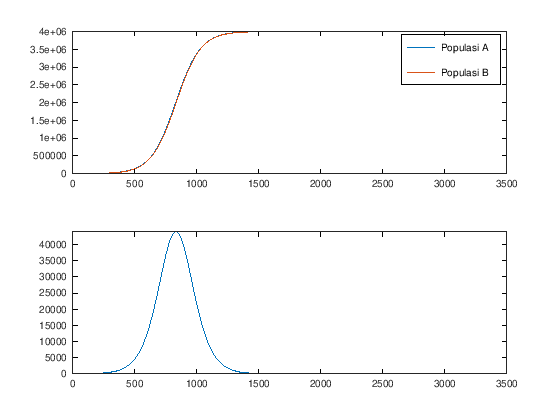

In [3]:
Kapasitas = 4e6; # kapasitas lingkungan
PopulasiA = [PopulasiAwal];
PopulasiB = [PopulasiAwal];
SelisihAB = [0];

# menghitung besar populasi baru setiap minggunya
for t = waktu(2:end)
    ert = exp(RasioTumbuh*t);
    PopulasiA(t) = Kapasitas*PopulasiAwal*ert/(Kapasitas + PopulasiAwal*(1+ert));
    PopulasiB(t) = PopulasiB(t-1)*(1 + RasioTumbuh*(1-PopulasiB(t-1)/Kapasitas));
    SelisihAB(t) = PopulasiA(t) - PopulasiB(t);
end

#plotting
subplot(2,1,1)
plot(PopulasiA, '-', PopulasiB, '-')
legend('Populasi A', 'Populasi B')

subplot(2,1,2)
plot(SelisihAB)
# perbaikan axis dikit
ylim([min(SelisihAB) max(SelisihAB)])

komen hasil

## Model Volterra-Lotka

### Predator-Prey

The Lotka–Volterra model makes a number of assumptions, not necessarily realizable in nature, about the environment and evolution of the predator and prey populations:[21]

    The prey population finds ample food at all times.
    The food supply of the predator population depends entirely on the size of the prey population.
    The rate of change of population is proportional to its size.
    During the process, the environment does not change in favour of one species, and genetic adaptation is inconsequential.
    Predators have limitless appetite.

As differential equations are used, the solution is deterministic and continuous. This, in turn, implies that the generations of both the predator and prey are continually overlapping.

Let s be the number of squirrels in the area and h be the number of hawks. If no
hawks are present, the change in s from time t ∆t to time t is as in the uncon-
strained model (see Module 2.2, “Unconstrained Growth and Decay”):
∆s = s(t) – s(t - ∆t)
= (squirrel growth at time t
= k s * s(t
∆t) * ∆t
∆t) * ∆t for constant k s
However, this prey’s population is reduced by an amount proportional to the product
of the number of hawks and the number of squirrels, h(t ∆t) * s(t ∆t). Thus, with
a proportionality constant k hs for this reduction, the change in the number of squirrels
from time t ∆t to time t is as follows:
∆s = s(t) – s(t
∆t)
= (squirrel growth at time t
= (k s * s(t
∆t) – k hs * h(t
∆t) * ∆t
∆t) * s(t
∆t)) * ∆t
for constants k s and k hs .
We can interpret the term k hs * h(t ∆t) * s(t ∆t) in a couple of ways. First,
h(t ∆t) * s(t ∆t) is the maximum number of distinct interactions of hawks with
squirrels. For example, for h(t ∆t) = 3 hawks and s(t ∆t) = 2 squirrels, (3)(2) = 6

possible pairings exist. The decrease in the number of squirrels is proportional to this
product, where the constant of proportionality, k hs , is related to the hunting ability of
the hawks and the survival ability of the squirrels. A second interpretation of k hs *
h(t ∆t) * s(t ∆t) = (k hs * h(t ∆t)) * s(t ∆t) is that the size of the squirrel popula-
tion decreases in proportion to the size of the hawk population.
While the squirrel population decreases with more contacts between the predator
and prey, the hawk population increases. Moreover, the death rate of hawks is pro-
portional to the number of hawks. Thus, the change in the hawk population from
time t ∆t to time t is as follows:
∆h = h(t) – h(t ∆t)
∆t) * ∆t
= (hawk growth at time t
∆t) * h(t
= (k sh * s(t
∆t) – k h * h(t
∆t)) * ∆t
for constants k sh and k h . Although the deaths of the squirrels and the births of the
hawks are both proportional to the product of the number of possible interactions of
the two populations, their constants of proportionality, k hs and k sh , respectively, are
probably different. For instance, 2% of the possible interactions might result in the
death of a squirrel, while only 1% of the possible interactions might contribute to the
birth of a hawk.
We can express the predator-prey model, known as the Lotka-Volterra model,
as the following pair of difference equations for the change in prey (here, change in
the squirre‘ ”“”u‘ati“n, ∆s) and change in predator (here, change in the hawk popu-
‘ati“n, ∆h) from time t ∆t to time t:
∆s = (k s * s(t ∆t) – k hs * h(t
∆t) * s(t ∆t)) * ∆t
∆h = (k sh * s(t ∆t) * h(t
∆t) – k h * h(t ∆t)) * ∆t
(1)
or as the following pair of differential equations:
ds
= k s s − k hs h s
dt
dh
= k sh s h − k h h
dt
(2)
Figure 4.2.1 contains a diagram for the predator-prey model with the prey population
affecting the nu’ber “f ”redat“r births and the ”redat“r ”“”u‘ati“n inluencing the
number of prey deaths.

### Kompetitif
Everyone is familiar with competition. We compete for attention in families, for
grades in school, for jobs and promotions, for parking spaces, and on and on. Com-
petition is integral to most economic activity. Through competition in human societ-
ies, wages and prices are set; quantities and types of products manufactured are se-
lected; businesses succeed or fail; and resources are distributed. Economic and social
competition may occur even in noncapitalist systems.
More broadly, competition is a basic characteristic of all communities, human
and nonhuman. It may occur within a population of the same species (intraspeciic),
like the human species, or it may occur between populations of different species
(interspeciic). Competitive interactions affect species distribution, community or-
ganization, and species evolution.
Simply speaking, competition is the struggle between individuals of a population
or between species for the same limiting resource. If one individual (species) re-
duces the availability of the resource to the other, we term that type of competition
exploitative, or resource depletion. This interaction is indirect and may involve
removal of the resource or denial of living space. If there is direct interaction be-
tween individuals (species), where one interferes with or denies access to a resource,
we term that competition interference. In this form, there may be physical contests
for territory or resource. Interference may also, as in some plants, involve the pro-
duction of toxic chemicals.
### Mutualisme